In [1]:
# CIFAR10 Image Classification using Keras

In [2]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.noise import GaussianNoise
from keras.layers.normalization import BatchNormalization
import pandas as pd
import matplotlib.pyplot as plt
import time, pickle
from keras.utils import to_categorical
%matplotlib inline

Using TensorFlow backend.


ModuleNotFoundError: No module named 'pandas'

In [ ]:
#Import Data

In [3]:
nb_classes = 10
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'validation samples')

X_train shape: (50000, 32, 32, 3)
50000 training samples
10000 validation samples


In [10]:
#Normalize

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
#To Categorical

In [7]:
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

In [14]:
#Create Model # 1
#模型采用类似于 VGG16 的结构：
#使用固定尺寸的小卷积核 (3x3)
#以2的幂次递增的卷积核数量 (64, 128, 256)
#两层卷积搭配一层池化
#全连接层没有采用 VGG16 庞大的三层结构，避免运算量过大，仅使用 128 个节点的单个FC
#权重初始化采用He Normal

In [24]:
x = Input(shape=(32, 32, 3))
y = x
y = Convolution2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = BatchNormalization()(y)
y = Convolution2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = BatchNormalization()(y)
y = MaxPooling2D(pool_size=2, strides=2, padding='valid')(y)

y = Convolution2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = BatchNormalization()(y)
y = Convolution2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = BatchNormalization()(y)
y = MaxPooling2D(pool_size=2, strides=2, padding='valid')(y)

y = Convolution2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = BatchNormalization()(y)
y = Convolution2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = BatchNormalization()(y)
y = MaxPooling2D(pool_size=2, strides=2, padding='valid')(y)

y = Flatten()(y)
y = Dense(units=128, activation='relu', kernel_initializer='he_normal')(y)
y = Dropout(0.5)(y)
y = Dense(units=nb_classes, activation='softmax', kernel_initializer='he_normal')(y)

# SGD (Stochastic Gradient Descent)
# lrate = 0.01
# decay = lrate / nb_epoch
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

model1 = Model(inputs=x, outputs=y, name='model1')

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 128)       73856     
__________

In [25]:
nb_epoch = 100
batch_size = 256
start = time.time()
h = model1.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=nb_epoch, validation_data=(X_test, y_test), shuffle=True)
model1.save('CIFAR10_model_no_data_augmentation.h5')
print('@ Total Time Spent: %.2f seconds' % (time.time() - start))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 21s 428us/step - loss: 1.7000 - acc: 0.3935 - val_loss: 1.2889 - val_acc: 0.5339
Epoch 2/100
50000/50000 [==============================] - 19s 388us/step - loss: 1.2071 - acc: 0.5695 - val_loss: 1.0245 - val_acc: 0.6261
Epoch 3/100
50000/50000 [==============================] - 19s 388us/step - loss: 0.9922 - acc: 0.6527 - val_loss: 0.8428 - val_acc: 0.7101
Epoch 4/100
50000/50000 [==============================] - 20s 390us/step - loss: 0.8394 - acc: 0.7109 - val_loss: 0.7655 - val_acc: 0.7423
Epoch 5/100
50000/50000 [==============================] - 20s 390us/step - loss: 0.7278 - acc: 0.7473 - val_loss: 0.7493 - val_acc: 0.7495
Epoch 6/100
50000/50000 [==============================] - 19s 390us/step - loss: 0.6338 - acc: 0.7828 - val_loss: 0.6952 - val_acc: 0.7702
Epoch 7/100
50000/50000 [==============================] - 20s 391us/step - loss: 0.5526 - acc: 0.8102 - val_l

Epoch 59/100
50000/50000 [==============================] - 20s 390us/step - loss: 0.0391 - acc: 0.9875 - val_loss: 1.1791 - val_acc: 0.8231
Epoch 60/100
50000/50000 [==============================] - 20s 390us/step - loss: 0.0356 - acc: 0.9887 - val_loss: 1.1485 - val_acc: 0.8208
Epoch 61/100
50000/50000 [==============================] - 20s 390us/step - loss: 0.0288 - acc: 0.9912 - val_loss: 1.1533 - val_acc: 0.8333
Epoch 62/100
50000/50000 [==============================] - 19s 390us/step - loss: 0.0344 - acc: 0.9890 - val_loss: 1.0298 - val_acc: 0.8310
Epoch 63/100
50000/50000 [==============================] - 20s 390us/step - loss: 0.0295 - acc: 0.9906 - val_loss: 1.1788 - val_acc: 0.8262
Epoch 64/100
50000/50000 [==============================] - 20s 390us/step - loss: 0.0350 - acc: 0.9894 - val_loss: 1.1091 - val_acc: 0.8284
Epoch 65/100
50000/50000 [==============================] - 20s 390us/step - loss: 0.0328 - acc: 0.9901 - val_loss: 1.1648 - val_acc: 0.8252
Epoch 66/100


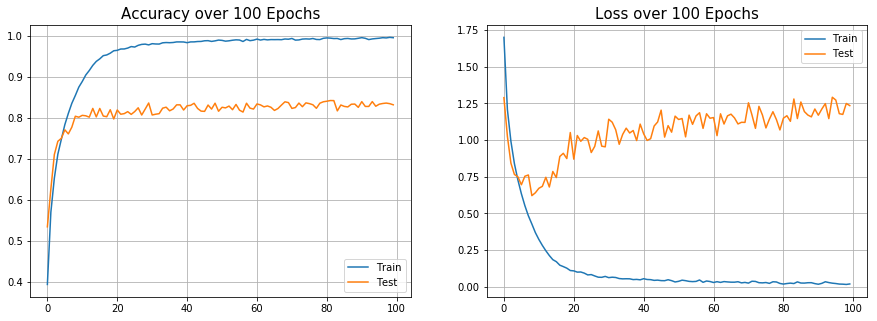

In [26]:
def plot_acc_loss(h, nb_epoch):
    acc, loss, val_acc, val_loss = h.history['acc'], h.history['loss'], h.history['val_acc'], h.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(nb_epoch), acc, label='Train')
    plt.plot(range(nb_epoch), val_acc, label='Test')
    plt.title('Accuracy over ' + str(nb_epoch) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(nb_epoch), loss, label='Train')
    plt.plot(range(nb_epoch), val_loss, label='Test')
    plt.title('Loss over ' + str(nb_epoch) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(h, nb_epoch)

In [27]:
loss, accuracy = model1.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (accuracy * 100, loss))
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (accuracy * 100, loss))

Training Accuracy = 99.43 %     loss = 0.018211
Testing Accuracy = 83.12 %    loss = 1.234681


In [19]:
#Further Training with Data Augmentation

In [28]:
aug_gen = ImageDataGenerator(
    featurewise_center = False,  # set input mean to 0 over the dataset
    samplewise_center = False,  # set each sample mean to 0
    featurewise_std_normalization = False,  # divide inputs by std of the dataset
    samplewise_std_normalization = False,  # divide each input by its std
    zca_whitening = False,  # apply ZCA whitening
    rotation_range = 0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip = True,  # randomly flip images
    vertical_flip = False,  # randomly flip images
)

aug_gen.fit(X_train)
gen = aug_gen.flow(X_train, y_train, batch_size=batch_size)
h = model1.fit_generator(generator=gen, steps_per_epoch=50000//batch_size, epochs=nb_epoch, validation_data=(X_test, y_test))
model1.save('CIFAR10_model_with_data_augmentation.h5')

Epoch 1/100
195/195 [==============================] - 19s 97ms/step - loss: 0.6413 - acc: 0.8132 - val_loss: 0.6525 - val_acc: 0.7978
Epoch 2/100
195/195 [==============================] - 19s 96ms/step - loss: 0.4771 - acc: 0.8500 - val_loss: 0.6797 - val_acc: 0.8095
Epoch 3/100
195/195 [==============================] - 19s 96ms/step - loss: 0.4280 - acc: 0.8643 - val_loss: 0.4956 - val_acc: 0.8430
Epoch 4/100
195/195 [==============================] - 19s 96ms/step - loss: 0.3918 - acc: 0.8732 - val_loss: 0.5027 - val_acc: 0.8509
Epoch 5/100
195/195 [==============================] - 19s 96ms/step - loss: 0.3656 - acc: 0.8833 - val_loss: 0.4887 - val_acc: 0.8507
Epoch 6/100
195/195 [==============================] - 19s 96ms/step - loss: 0.3419 - acc: 0.8894 - val_loss: 0.4649 - val_acc: 0.8535
Epoch 7/100
195/195 [==============================] - 19s 96ms/step - loss: 0.3320 - acc: 0.8935 - val_loss: 0.5430 - val_acc: 0.8385
Epoch 8/100
195/195 [==============================] - 

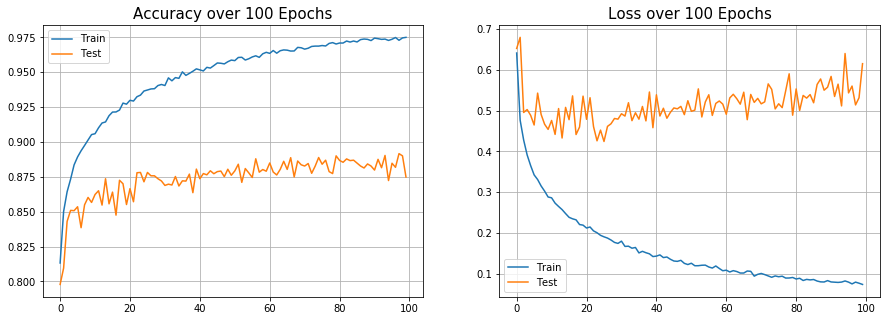

In [29]:
plot_acc_loss(h, nb_epoch)

In [22]:
#可以看到，使用数据增强后继续训练模型，可以将准确率从80%提升至87%。

In [30]:
loss, accuracy = model1.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (accuracy * 100, loss))
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (accuracy * 100, loss))

Training Accuracy = 96.95 %     loss = 0.095320
Testing Accuracy = 87.48 %    loss = 0.615214
